<a href="https://colab.research.google.com/github/Manojgharge07/Machine_Learning_Data_Science/blob/main/Support_Vector_Machine_Data_of_US_Airline_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

**Objective**

You are given a data of US Airline tweets and their sentiment. The task is to do sentiment analysis about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#import some library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [36]:
#load our dataset
data = pd.read_csv('/content/drive/MyDrive/All CSV files/Tweets.csv')

In [37]:
#dimension of dataset
data.shape

(14640, 15)

In [38]:
#display our data
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [39]:
#checking info our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [40]:
#checking columns in our data
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [41]:
#checking null values in our data
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

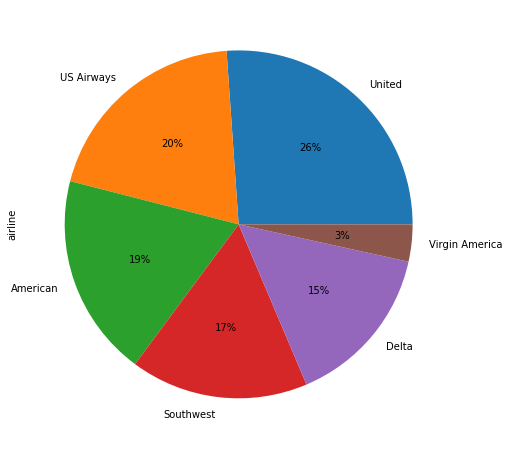

In [42]:
data.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [43]:
#checking unique values 
data.nunique()

tweet_id                        14484
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3022
user_timezone                      85
dtype: int64

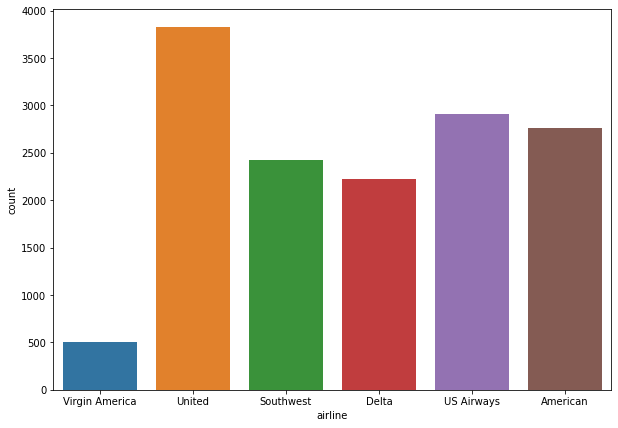

In [44]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x="airline", data=data)

# **Preprocessing on data**

In [45]:
data['tweet_created'] = pd.to_datetime(data['tweet_created']).dt.date

In [46]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'])

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  float64       
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   airline_sentiment_gold        40 non-null     object        
 7   name                          14640 non-null  object        
 8   negativereason_gold           32 non-null     object        
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  object        
 11  tweet_coord                 

In [48]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)


In [49]:
# Unique values of sentiment
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

Text(0.5, 1.0, 'Count of Type of Sentiment')

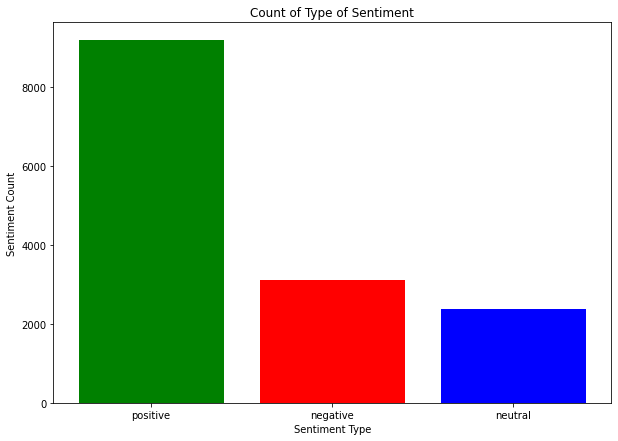

In [50]:
counter = data.airline_sentiment.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(10,7))
plt.bar(index,counter,color=['green','red','blue'])
plt.xticks(index,['positive','negative','neutral'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')

Drop neutral sentiment

In [51]:
data.drop(data.loc[data['airline_sentiment']=='neutral'].index, inplace=True)

Using lable encoading

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['airline_sentiment'])

data['airline_sentiment_encoded'] = le.transform(data['airline_sentiment'])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,airline_sentiment_encoded
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),1
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),0
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),0
5,5.703008e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24,NaN,Pacific Time (US & Canada),0
6,5.703006e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24,San Francisco CA,Pacific Time (US & Canada),1


Split the data

In [53]:
X = data["text"]
y = data["airline_sentiment"]

In [54]:
from sklearn.model_selection import train_test_split
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.2, random_state=101)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer(stop_words="english")
tfidf.fit(Xtrain)

TfidfVectorizer(stop_words='english')

In [56]:
print(tfidf.get_feature_names())

['00', '000', '000419', '000lbs', '0016', '00a', '00am', '00pm', '0162424965446', '0162431184663', '01pm', '02', '03', '0316', '0372389047497', '04', '0400', '04sdytt7zd', '05', '0510', '05am', '05pm', '0600', '0638', '0671', '07', '08', '0bjnz4eix5', '0ewj7oklji', '0kn7pjelzl', '0prgysvurm', '0wbjawx7xd', '10', '100', '1000', '1002', '1007', '101', '1019', '1020', '1027', '1028', '103', '1030pm', '1032', '104', '1046', '105', '1050', '1051', '106', '1074', '1079871763', '1080', '1081', '1086', '108639', '1099', '10a', '10am', '10f', '10hrs', '10m', '10min', '10mins', '10p', '10pm', '10th', '10x', '10yr', '11', '1101', '1106', '1108', '1109', '1114', '1117', '112', '1120am', '1137', '1140', '1142', '1146', '1152', '1153', '1159', '1161', '117', '1170', '1171', '1172', '118', '1180', '1181', '11a', '11am', '11pm', '11th', '12', '120', '1200', '1212', '1217', '122', '1220', '1225', '1228', '1229', '123', '1230', '1230am', '1242', '1249', '125', '1254', '125k', '1261', '1265', '127', '127

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [57]:
print(tfidf.vocabulary_)

{'usairways': 10264, 'hours': 5189, 'like': 6041, 'joke': 5709, 'united': 10135, 'layover': 5945, 'itinerary': 5579, 'swapped': 9369, 'really': 7969, 'southwestair': 9001, '10': 32, '55': 848, 'flight': 4360, 'nice': 6824, 'helpful': 5035, 'just': 5743, 'hoping': 5153, 'll': 6087, 'fly': 4428, 'thank': 9551, 'americanair': 1539, 'realize': 7966, 'customer': 3213, 'service': 8656, 'leaves': 5970, 'desired': 3432, 'folks': 4465, 'handling': 4928, 'calls': 2437, 'care': 2480, 'shows': 8763, 'waiting': 10447, 'pick': 7434, 'coming': 2852, 'http': 5203, 'nopq5xisbs': 6908, 'saga': 8453, 'melissaafrancis': 6429, 'bag': 1934, 'delay': 3363, 'reunion': 8264, 'forced': 4482, 'shopping': 8735, 'stay': 9133, 'tuned': 9893, 'tell': 9509, 'going': 4764, 'cover': 3103, 'room': 8368, 'jetblue': 5655, 'airline': 1443, 'use': 10277, 'applepay': 1657, 'airlines': 1447, 'yes': 10815, 'good': 4776, 'hold': 5102, '1hour': 299, '2x': 511, 'day': 3294, 'sun': 9302, 'book': 2193, 'way': 10514, 'flt': 4414, 'd

In [58]:
count_vect = CountVectorizer(stop_words="english")
neg_matrix = count_vect.fit_transform(data[data["airline_sentiment"]=="negative"]["text"])
freqs = zip(count_vect.get_feature_names(), neg_matrix.sum(axis=0).tolist()[0])
# Sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1])[:100])

[('flight', 2943), ('united', 2899), ('usairways', 2375), ('americanair', 2110), ('southwestair', 1214), ('jetblue', 1052), ('cancelled', 926), ('service', 750), ('hours', 649), ('just', 622), ('help', 619), ('customer', 614), ('hold', 614), ('time', 598), ('plane', 532), ('delayed', 508), ('amp', 503), ('hour', 452), ('flightled', 448), ('http', 437), ('bag', 420), ('flights', 420), ('gate', 411), ('ve', 399), ('don', 388), ('late', 378), ('need', 373), ('phone', 369), ('waiting', 341), ('thanks', 315), ('got', 299), ('airline', 294), ('like', 292), ('trying', 288), ('delay', 273), ('wait', 272), ('today', 269), ('minutes', 267), ('going', 252), ('day', 251), ('bags', 245), ('luggage', 245), ('told', 245), ('airport', 244), ('people', 243), ('worst', 241), ('fly', 239), ('really', 236), ('did', 227), ('guys', 225), ('weather', 224), ('lost', 221), ('agent', 220), ('hrs', 217), ('way', 215), ('make', 211), ('change', 210), ('seat', 208), ('flighted', 205), ('want', 205), ('check', 204)

In [59]:
Xtrain_tfidf = tfidf.transform(Xtrain)
Xvalid_tfidf = tfidf.transform(Xvalid)

In [60]:
Xtrain_tfidf.toarray().shape

(9232, 10890)

Create a model SVM

Evaluating models

In [61]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(Xtrain_tfidf, ytrain)
#predicting output for test data
pred = model.predict(Xvalid_tfidf)

In [62]:
#accuracy score
accuracy_score(yvalid,pred)

0.9116500649631876

In [63]:
#building confusion matrix
cm = confusion_matrix(yvalid, pred)
cm

array([[1758,   58],
       [ 146,  347]])

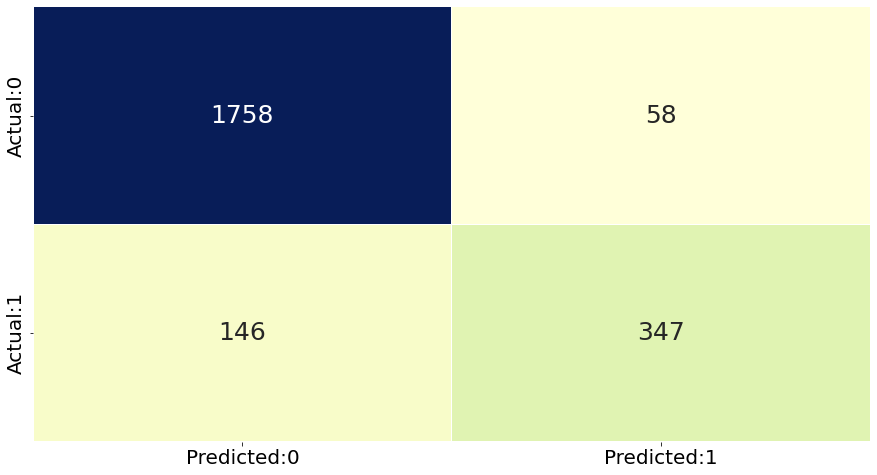

In [64]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()
